In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Combining both the train and test dataset to do feature engineering. We will divide them later.

In [4]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print (train.shape, test.shape, data.shape)

(43400, 13) (18601, 12) (62001, 13)


In [5]:
data.head()

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,id,smoking_status,source,stroke,work_type
0,Rural,3.0,95.12,18.0,No,Male,0,0,30669,NaN,train,0.0,children
1,Urban,58.0,87.96,39.2,Yes,Male,0,1,30468,never smoked,train,0.0,Private
2,Urban,8.0,110.89,17.6,No,Female,0,0,16523,NaN,train,0.0,Private
3,Rural,70.0,69.04,35.9,Yes,Female,0,0,56543,formerly smoked,train,0.0,Private
4,Rural,14.0,161.28,19.1,No,Male,0,0,46136,NaN,train,0.0,Never_worked


We will now check for the missing values.

In [6]:
data.apply(lambda x: sum(x.isnull()))

Residence_type           0
age                      0
avg_glucose_level        0
bmi                   2053
ever_married             0
gender                   0
heart_disease            0
hypertension             0
id                       0
smoking_status       19043
source                   0
stroke               18601
work_type                0
dtype: int64

Lets look at some basic statistics for numerical variables.

In [7]:
data.describe()

,age,avg_glucose_level,bmi,heart_disease,hypertension,id,stroke
count,62001.000000,62001.000000,59948.000000,62001.000000,62001.000000,62001.000000,43400.000000
mean,42.169475,104.453832,28.587099,0.047677,0.093450,36452.514814,0.018041
std,22.522100,42.960537,7.766122,0.213083,0.291065,21067.155945,0.133103
min,0.080000,55.000000,10.100000,0.000000,0.000000,1.000000,0.000000
25%,24.000000,77.540000,23.200000,0.000000,0.000000,18187.000000,0.000000
50%,44.000000,91.660000,27.700000,0.000000,0.000000,36463.000000,0.000000
75%,60.000000,112.120000,32.800000,0.000000,0.000000,54693.000000,0.000000
max,82.000000,291.050000,97.600000,1.000000,1.000000,72943.000000,1.000000


In [8]:
data.apply(lambda x: len(x.unique()))

Residence_type           2
age                    104
avg_glucose_level    14143
bmi                    583
ever_married             2
gender                   3
heart_disease            2
hypertension             2
id                   62001
smoking_status           4
source                   2
stroke                   3
work_type                5
dtype: int64

Let’s explore further using the frequency of different categories in each nominal variable.

In [9]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['id', 'source', 'stroke']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (data[col].value_counts())


Frequency of Categories for varible Residence_type
Urban    31066
Rural    30935
Name: Residence_type, dtype: int64

Frequency of Categories for varible ever_married
Yes    39877
No     22124
Name: ever_married, dtype: int64

Frequency of Categories for varible gender
Female    36622
Male      25366
Other        13
Name: gender, dtype: int64

Frequency of Categories for varible smoking_status
never smoked       22886
formerly smoked    10753
smokes              9319
Name: smoking_status, dtype: int64

Frequency of Categories for varible work_type
Private          35584
Self-employed     9654
children          8769
Govt_job          7742
Never_worked       252
Name: work_type, dtype: int64


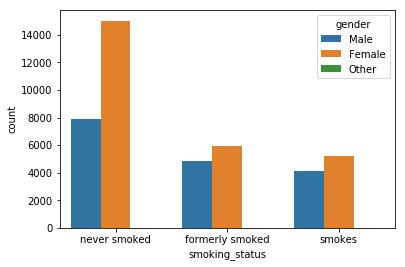

In [10]:
sns.countplot(x = 'smoking_status', hue= 'gender', data= data)

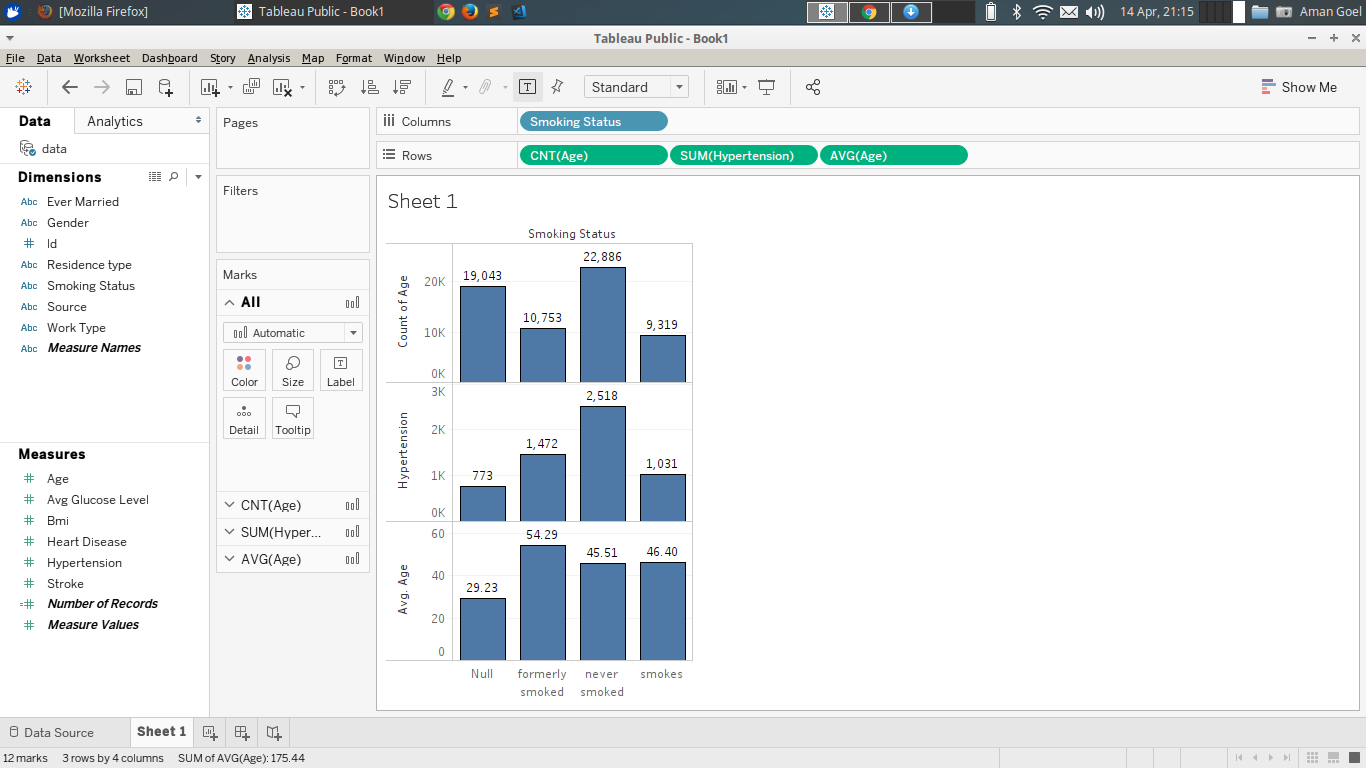

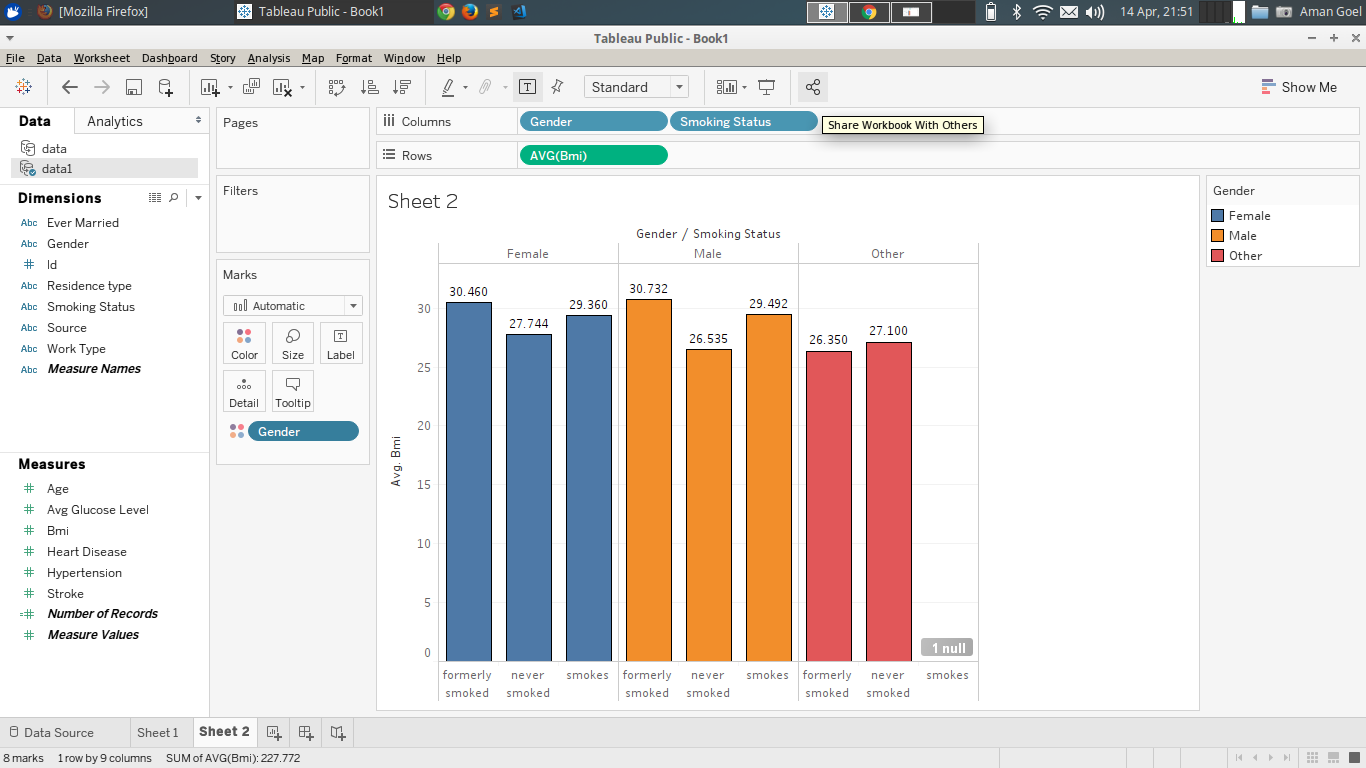

## Data Cleaning

### Imputing values for smoking status

In [11]:
def impute_smoking_status(cols):
    smoking_status = cols[0]
    work_type = cols[1]
    hypertension = cols[2]
    age = cols[3]
    
    if pd.isnull(smoking_status):
        
        if work_type == 'children' or hypertension == 1:
            return 'never smoked'
        elif work_type!= 'children' and hypertension == 0:
            if age>=50:
                return 'formerly smoked'
            elif age<50:
                return 'smokes'
    else:
        return smoking_status
        

In [12]:
data['smoking_status'] = data[['smoking_status', 'work_type', 'hypertension', 'age']].apply(impute_smoking_status,
                                                                                           axis= 1)

Again checking for the frequency of different categories.

In [13]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['id', 'source', 'stroke']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (data[col].value_counts())


Frequency of Categories for varible Residence_type
Urban    31066
Rural    30935
Name: Residence_type, dtype: int64

Frequency of Categories for varible ever_married
Yes    39877
No     22124
Name: ever_married, dtype: int64

Frequency of Categories for varible gender
Female    36622
Male      25366
Other        13
Name: gender, dtype: int64

Frequency of Categories for varible smoking_status
never smoked       31568
smokes             15431
formerly smoked    15002
Name: smoking_status, dtype: int64

Frequency of Categories for varible work_type
Private          35584
Self-employed     9654
children          8769
Govt_job          7742
Never_worked       252
Name: work_type, dtype: int64


### Imputing values for bmi.

In [14]:
def impute_bmi(cols):
    
    Gender = cols[0]
    bmi = cols[1]
    smoking_status = cols[2]
    
    if pd.isnull(bmi):
        if Gender == 'Female':
            if smoking_status == 'formerly smoked':
                return 30.460
            elif smoking_status == 'never smoked':
                return 27.744
            elif smoking_status == 'smokes':
                return 29.360
        elif Gender == 'Male':
            if smoking_status == 'formerly smoked':
                return 30.732
            elif smoking_status == 'never smoked':
                return 26.535
            elif smoking_status == 'smokes':
                return 29.492
        else:
            return 26.538
    else:
        return bmi

In [15]:
data['bmi'] = data[['gender', 'bmi', 'smoking_status']].apply(impute_bmi, axis = 1)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62001 entries, 0 to 62000
Data columns (total 13 columns):
Residence_type       62001 non-null object
age                  62001 non-null float64
avg_glucose_level    62001 non-null float64
bmi                  62001 non-null float64
ever_married         62001 non-null object
gender               62001 non-null object
heart_disease        62001 non-null int64
hypertension         62001 non-null int64
id                   62001 non-null int64
smoking_status       62001 non-null object
source               62001 non-null object
stroke               43400 non-null float64
work_type            62001 non-null object
dtypes: float64(4), int64(3), object(6)
memory usage: 6.1+ MB


## Feature Engineering

In [17]:
def diabetic(col):
    Glucose = col[0]
    
    if Glucose < 145:
        return 0
    else:
        return 1

In [18]:
data['diabetic'] = data[['avg_glucose_level']].apply(diabetic, axis= 1)

In [19]:
data.head()

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,id,smoking_status,source,stroke,work_type,diabetic
0,Rural,3.0,95.12,18.0,No,Male,0,0,30669,never smoked,train,0.0,children,0
1,Urban,58.0,87.96,39.2,Yes,Male,0,1,30468,never smoked,train,0.0,Private,0
2,Urban,8.0,110.89,17.6,No,Female,0,0,16523,smokes,train,0.0,Private,0
3,Rural,70.0,69.04,35.9,Yes,Female,0,0,56543,formerly smoked,train,0.0,Private,0
4,Rural,14.0,161.28,19.1,No,Male,0,0,46136,smokes,train,0.0,Never_worked,1


In [20]:
def Health(col):
    
    bmi = col[0]
    
    if bmi < 18.5:
        return 'underweight'
    elif (bmi > 18.5 and bmi < 24.9):
        return 'healthy'
    elif (bmi > 24.9 and bmi < 29.9):
        return 'overweight'
    else:
        return 'obese'

In [21]:
data['health'] = data[['bmi']].apply(Health, axis= 1)

In [22]:
data.head()

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,id,smoking_status,source,stroke,work_type,diabetic,health
0,Rural,3.0,95.12,18.0,No,Male,0,0,30669,never smoked,train,0.0,children,0,underweight
1,Urban,58.0,87.96,39.2,Yes,Male,0,1,30468,never smoked,train,0.0,Private,0,obese
2,Urban,8.0,110.89,17.6,No,Female,0,0,16523,smokes,train,0.0,Private,0,underweight
3,Rural,70.0,69.04,35.9,Yes,Female,0,0,56543,formerly smoked,train,0.0,Private,0,obese
4,Rural,14.0,161.28,19.1,No,Male,0,0,46136,smokes,train,0.0,Never_worked,1,healthy


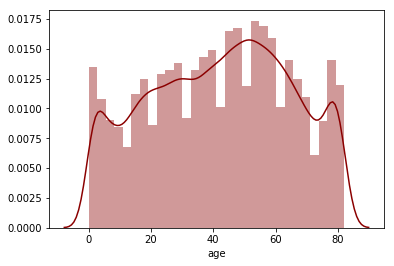

In [23]:
sns.distplot(data['age'], color='darkred', bins=30)

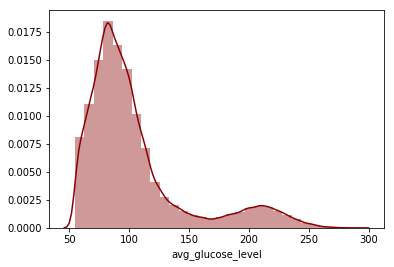

In [24]:
sns.distplot(data['avg_glucose_level'], color='darkred', bins=30)

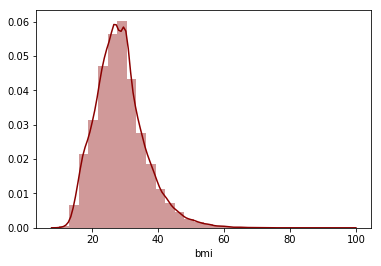

In [25]:
sns.distplot(data['bmi'], color='darkred', bins=30)

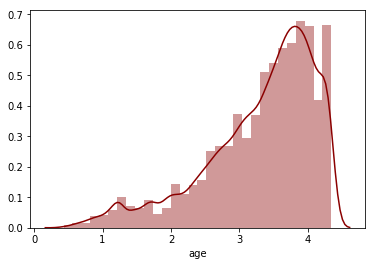

In [26]:
sns.distplot(np.cbrt(data['age']), color='darkred', bins=30)

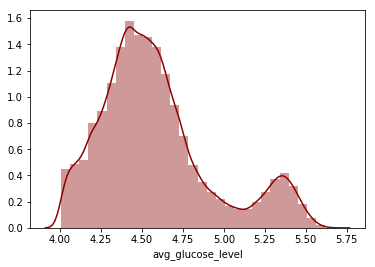

In [27]:
sns.distplot(np.log(data['avg_glucose_level']), color='darkred', bins=30)

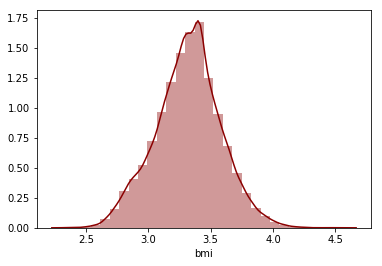

In [28]:
sns.distplot(np.log(data['bmi']), color='darkred', bins=30)

In [29]:
data['bmi_log'] = np.log(data['bmi'])
data['age_cbrt'] = np.sqrt(data['age'])

In [30]:
data.columns

Index(['Residence_type', 'age', 'avg_glucose_level', 'bmi', 'ever_married',
       'gender', 'heart_disease', 'hypertension', 'id', 'smoking_status',
       'source', 'stroke', 'work_type', 'diabetic', 'health', 'bmi_log',
       'age_cbrt'],
      dtype='object')

In [31]:
dataset1 = data

In [32]:
residence = pd.get_dummies(dataset1['Residence_type'], drop_first= True)
ever_married = pd.get_dummies(dataset1['ever_married'], drop_first= True)
gender = pd.get_dummies(dataset1['gender'], drop_first= True)
smoking_status = pd.get_dummies(dataset1['smoking_status'], drop_first= True)
work_type = pd.get_dummies(dataset1['work_type'], drop_first= True)
#health = pd.get_dummies(dataset1['health'], drop_first= True)

In [33]:
dataset1.drop(['Residence_type', 'ever_married', 'gender', 'smoking_status', 'work_type', 'health'],
             axis= 1, inplace= True)

In [34]:
dataset1 = pd.concat([dataset1,residence,ever_married,gender,smoking_status,work_type], axis= 1)

In [35]:
dataset1.shape

(62001, 21)

In [36]:
#Divide into test and train:
train1 = dataset1.loc[dataset1['source']=="train"]
test1 = dataset1.loc[dataset1['source']=="test"]

#Drop unnecessary columns:
test1.drop(['stroke','source'],axis=1,inplace=True)
train1.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train1.to_csv("train_modified1.csv",index=False)
test1.to_csv("test_modified1.csv",index=False)

/home/aman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/aman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


## Model Building

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

In [38]:
X_train,X_test,y_train,y_test= train_test_split(train1.drop(['stroke','bmi','age','avg_glucose_level','id'],axis=1), 
                                                    train1['stroke'], test_size=0.30, random_state=101)

### Logistic Regression Classifier

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lrmod = LogisticRegression()
lrmod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
print (roc_auc_score(y_test, lrmod.predict_proba(X_test)[:,1]))

0.8453868348982785


### XGBoost Classifier

In [42]:
from xgboost import XGBClassifier

In [43]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_prob = xgb.predict_proba(X_test)

In [44]:
print (roc_auc_score(y_test, y_prob[:,1]))

0.8580637063119457
